# Symmetric vs asymmetric parcellation


In [1]:
import sys
sys.path.append("..")
import ProbabilisticParcellation.evaluate as ev
import ProbabilisticParcellation.util as ut
import ProbabilisticParcellation.export_atlas as ea
import ProbabilisticParcellation.scripts.atlas_paper.parcel_hierarchy as ph
import ProbabilisticParcellation.scripts.atlas_paper.evaluate_atlas as eva
import hierarchical_clustering as cl
from Functional_Fusion.dataset import *
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import torch as pt



In [2]:
figsize = (20, 20)
lut_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'
_, cmap, labels = nt.read_lut(lut_dir +
                              'sym_MdPoNiIbWmDeSo_space-MNISymC2_K-68.lut')
models = [
    'Models_03/sym_MdPoNiIbWmDeSo_space-MNISymC2_K-68',
    'Models_03/asym_MdPoNiIbWmDeSo_space-MNISymC2_K-68_arrange-asym_sep-hem']

model_pair = ['Models_03/sym_MdPoNiIbWmDeSo_space-MNISymC2_K-68_reordered',
              'Models_03/asym_MdPoNiIbWmDeSo_space-MNISymC2_K-68_arrange-asym_sep-hem_reordered']

atlas = 'MNISymC2'

# Group Symmetry

In [3]:
# Read in individual and group correlation
model_pair = ['Models_03/sym_MdPoNiIbWmDeSo_space-MNISymC2_K-68_reordered',
              'Models_03/asym_MdPoNiIbWmDeSo_space-MNISymC2_K-68_arrange-asym_sep-hem_reordered']


asym_sym_corr_group = np.load(f'{ut.model_dir}/Models/{model_pair[0]}_asym_sym_corr_group.npy')


In [4]:
atlas = 'MNISymC2'
dtype = 'func'
cmap = 'hot'
cscale = (0, 1)
labels = None,
colorbar = True


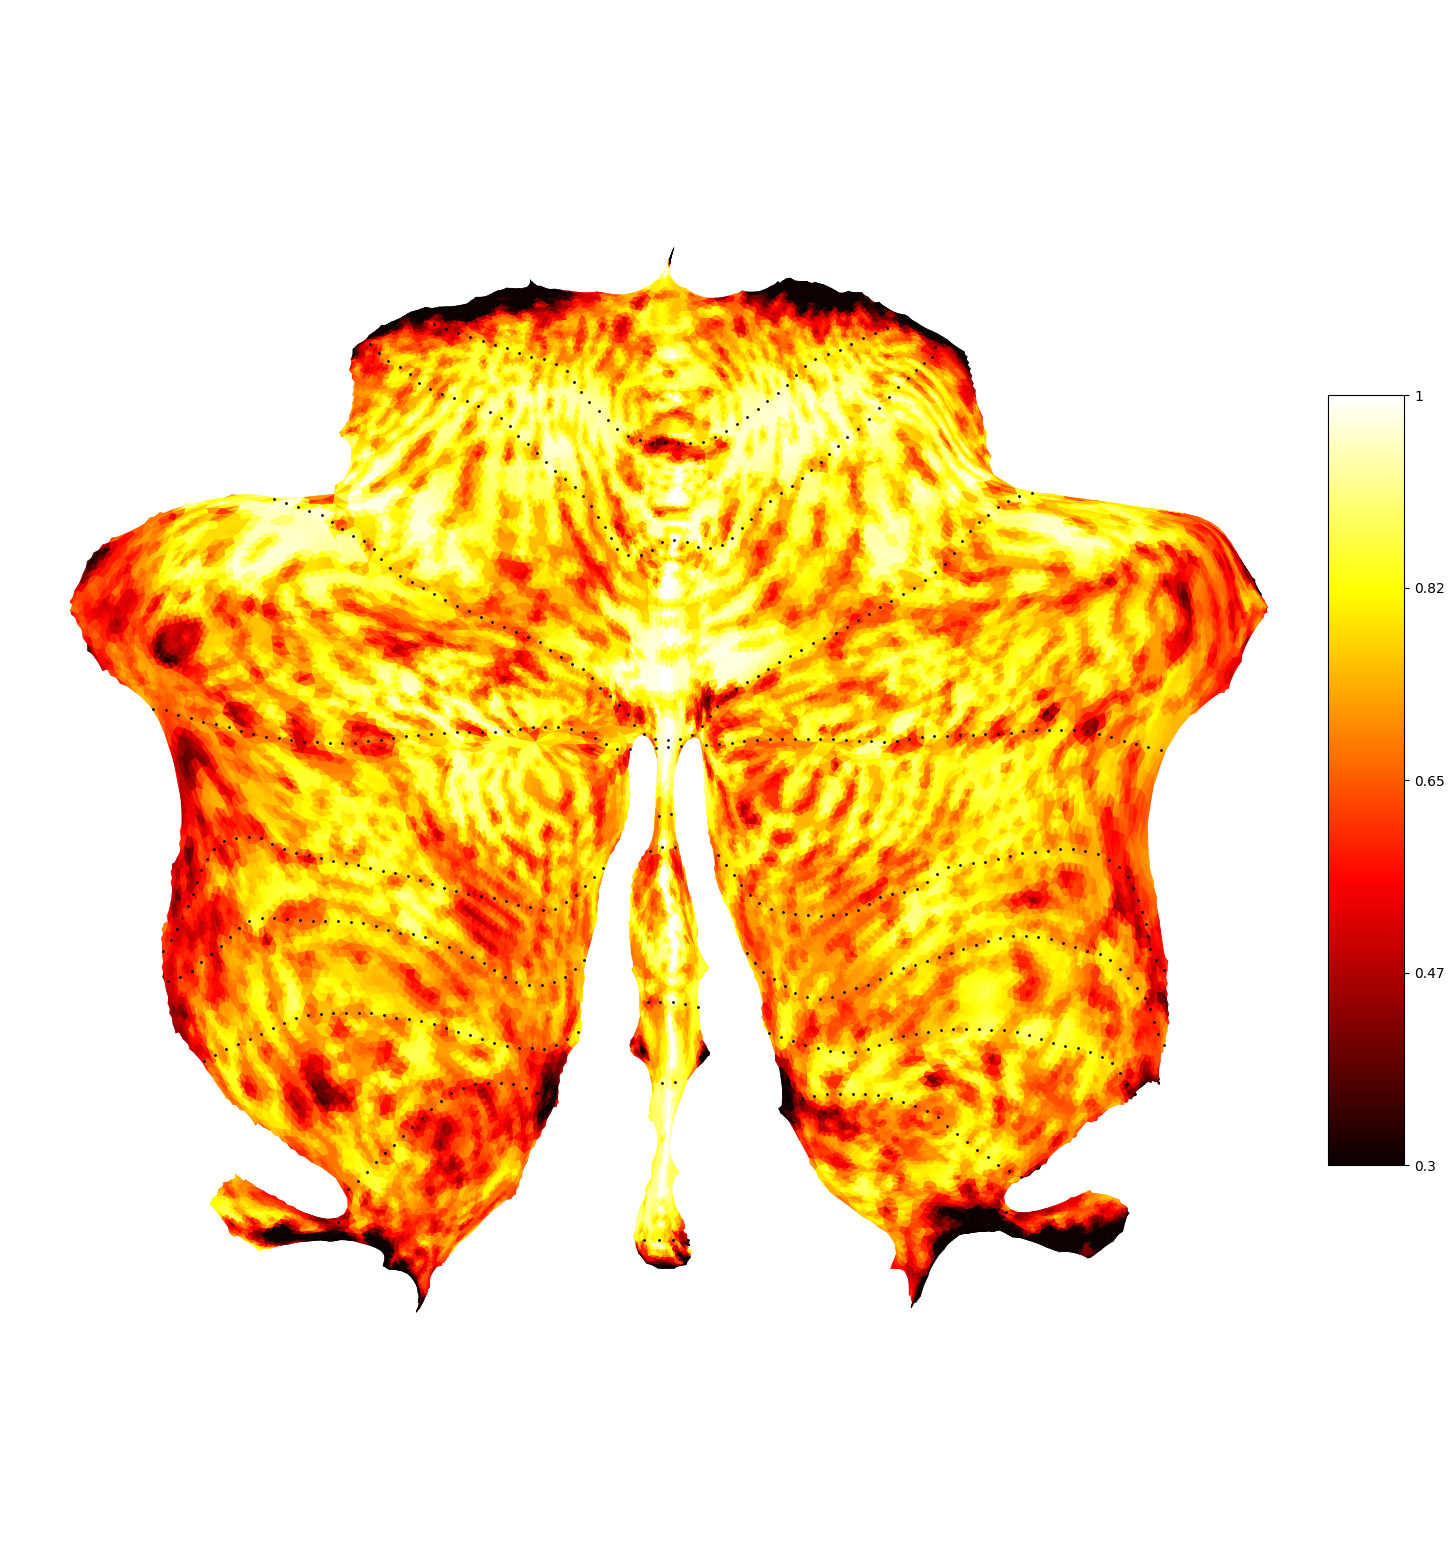

In [5]:

plt.figure(figsize=(20, 20))
ax = ut.plot_data_flat(asym_sym_corr_group, atlas,
                       dtype=dtype,
                       render='matplotlib',
                       cmap='hot',
                        cscale=(0.3, 1),
                       labels=labels,
                       colorbar=colorbar)
plt.show()


In [8]:
figsize = [20, 20]
fig = plt.figure(figsize=figsize)
sym_score = cl.make_symmetry_map(model_pair[0], cmap='hot', cscale=[0.3, 1])


# Individual Symmetry

In [ ]:
asym_sym_corr_indiv = np.load(
    f'{ut.model_dir}/Models/{model_pair[0]}_asym_sym_corr_indiv.npy')


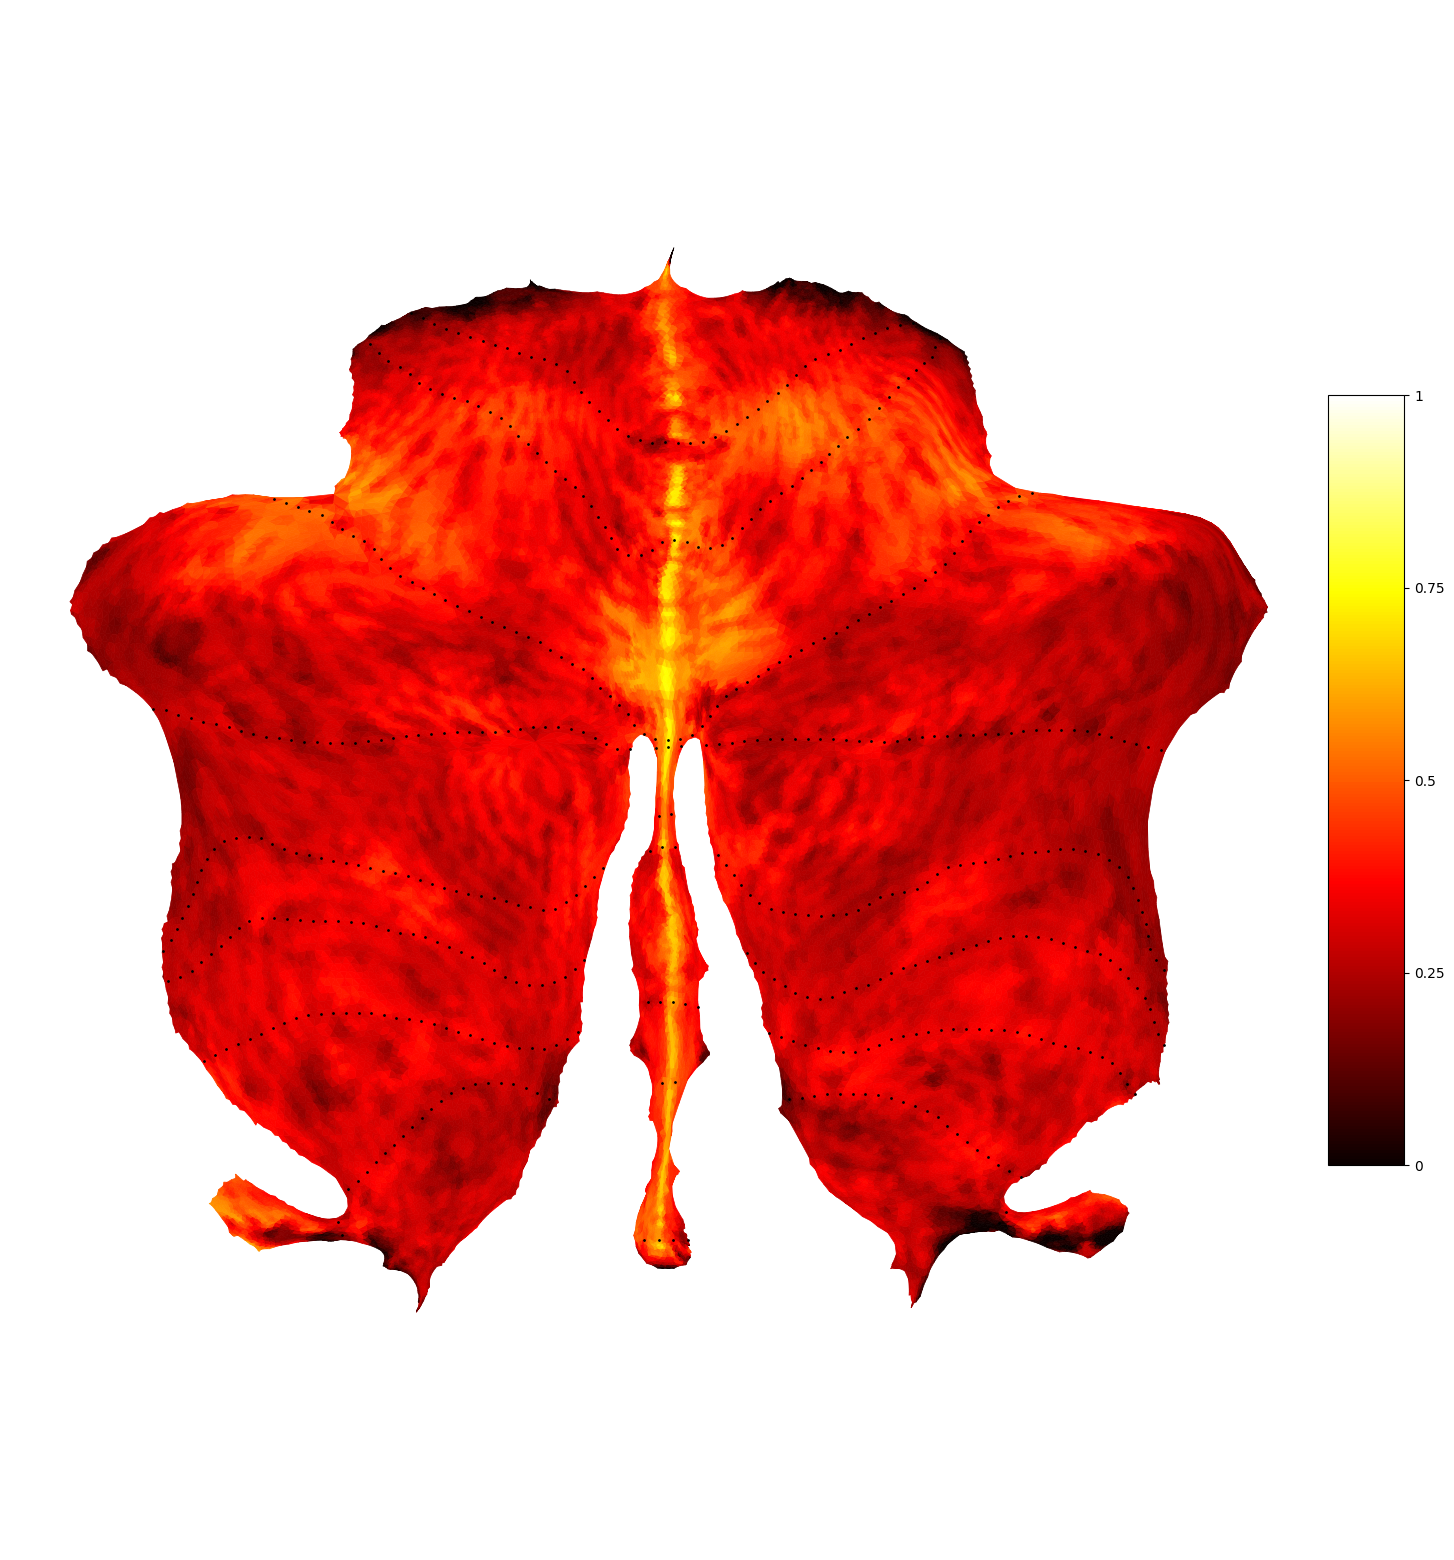

In [51]:

plt.figure(figsize=(20, 20))
ax = ut.plot_data_flat(asym_sym_corr_indiv.mean(axis=0), atlas,
                       dtype=dtype,
                       render='matplotlib',
                       cmap='hot',
                       cscale=cscale,
                       labels=labels,
                       colorbar=colorbar)
plt.show()


In [24]:
# Load number of participants
T = pd.read_csv(ut.base_dir + '/dataset_description.tsv', sep='\t')
n_subjects = T.num_particpants[:7].values
# Make index start at 0
sub_cumulative = np.cumsum(n_subjects)-1
print(sub_cumulative)


[ 23  31  37  50  66 103 111]


In [25]:
# Loop through n_subjects and group ari, ri, corr & cosang by dataset
corr_dataset = []
for i in range(len(n_subjects)):
    # print subjects to average to check subject indexing is correct
    
    if i == 0:
        print(sub_cumulative[i])
        corr_dataset.append(asym_sym_corr_indiv[:sub_cumulative[i]].mean(axis=0))
    else:
        print(sub_cumulative[i-1]+1, sub_cumulative[i])
        corr_dataset.append(
            asym_sym_corr_indiv[sub_cumulative[i-1]+1:sub_cumulative[i]].mean(axis=0))


23
24 31
32 37
38 50
51 66
67 103
104 111


<AxesSubplot: title={'center': 'Somatotopic'}>

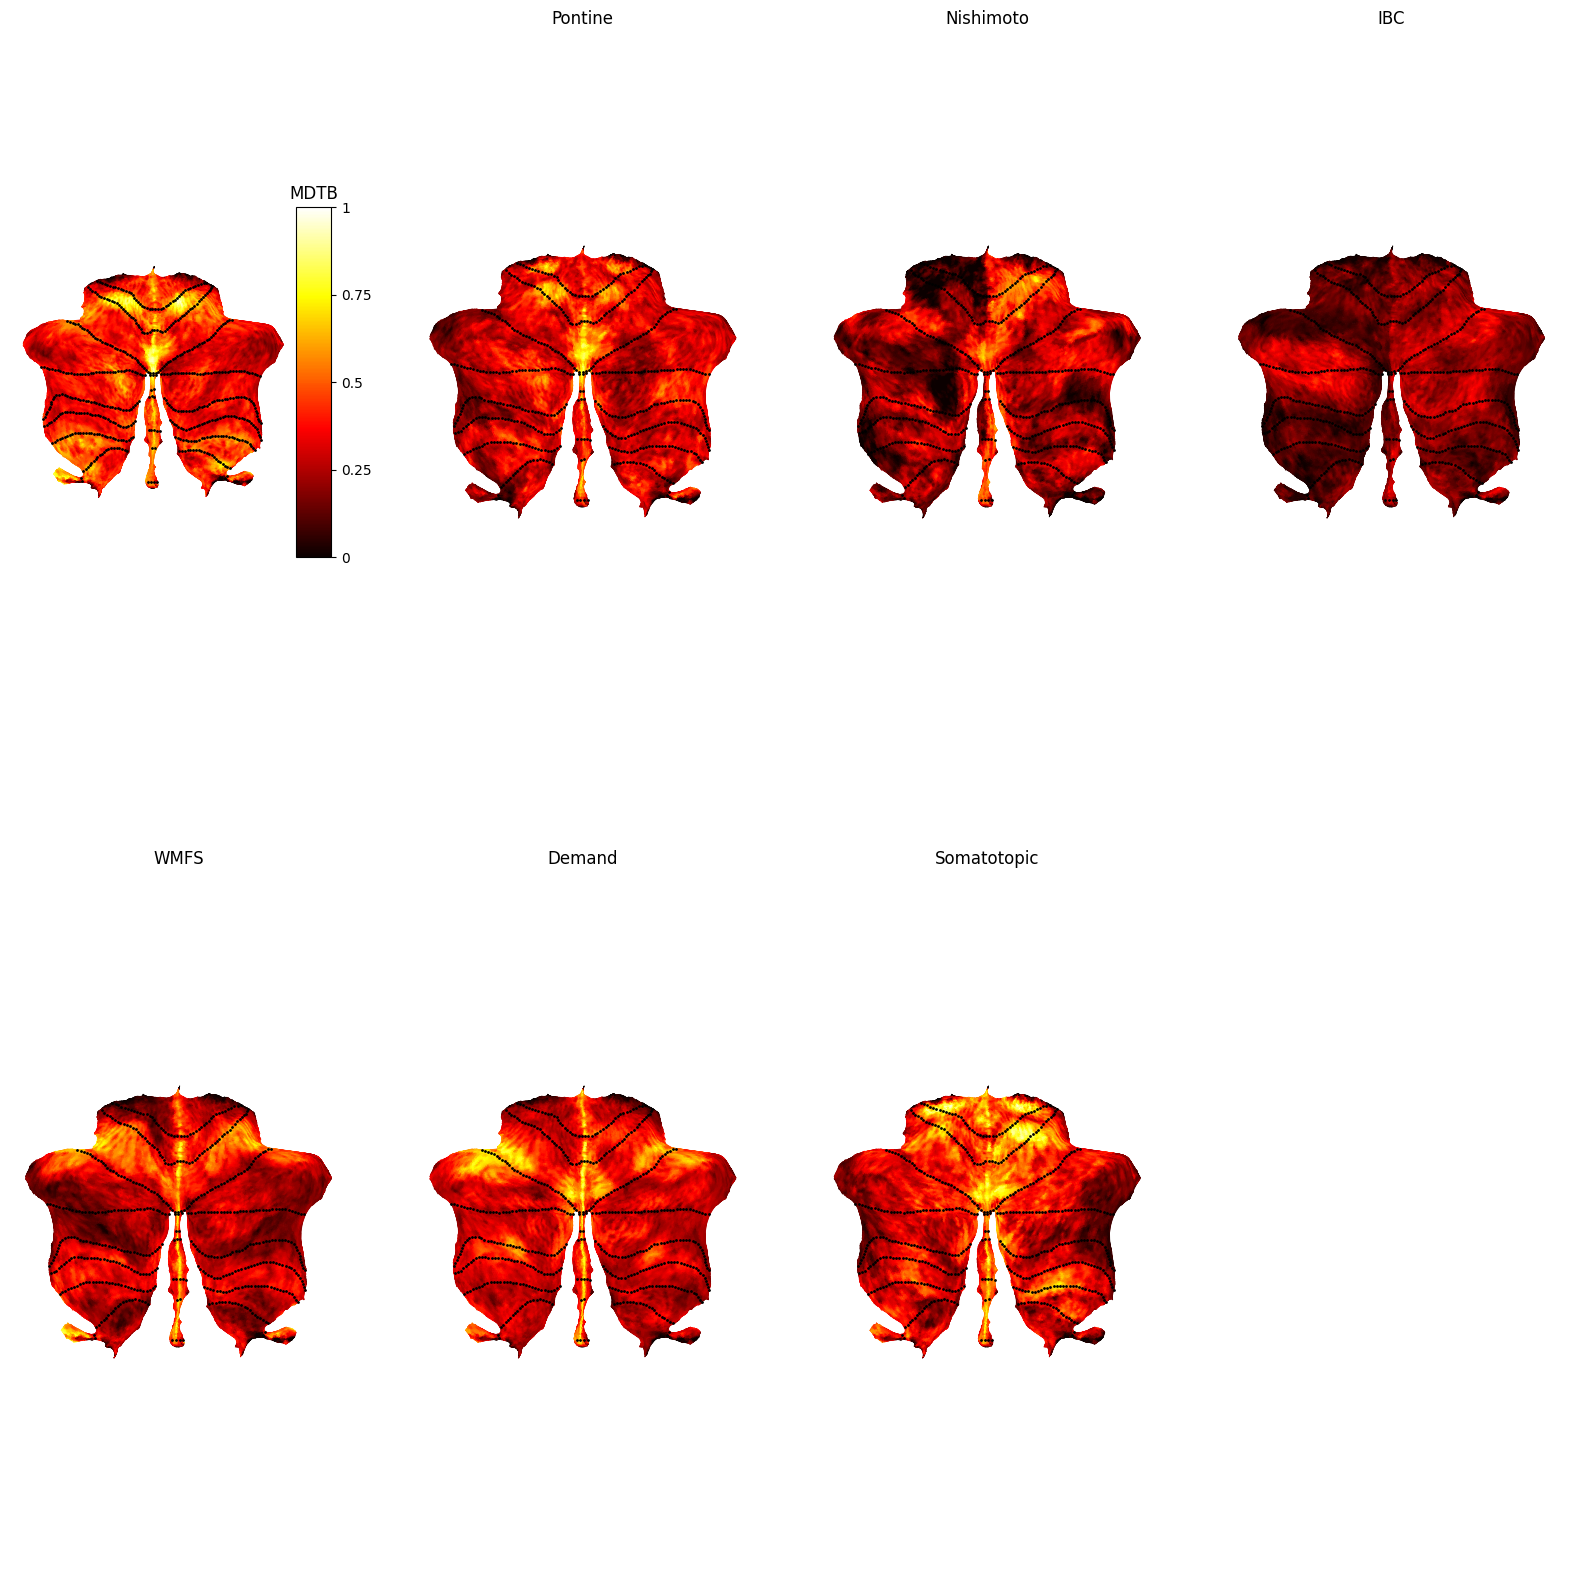

In [42]:
# Plot the results by dataset
plt.figure(figsize=(20, 20))
ut.plot_multi_flat(corr_dataset, 'MNISymC2',
                   grid=(2, 4),
                   dtype='func',
                   colorbar=True,
                   cmap='hot',
                    cscale=(0, 1),
                   titles=T.name[:7].values)


<AxesSubplot: >

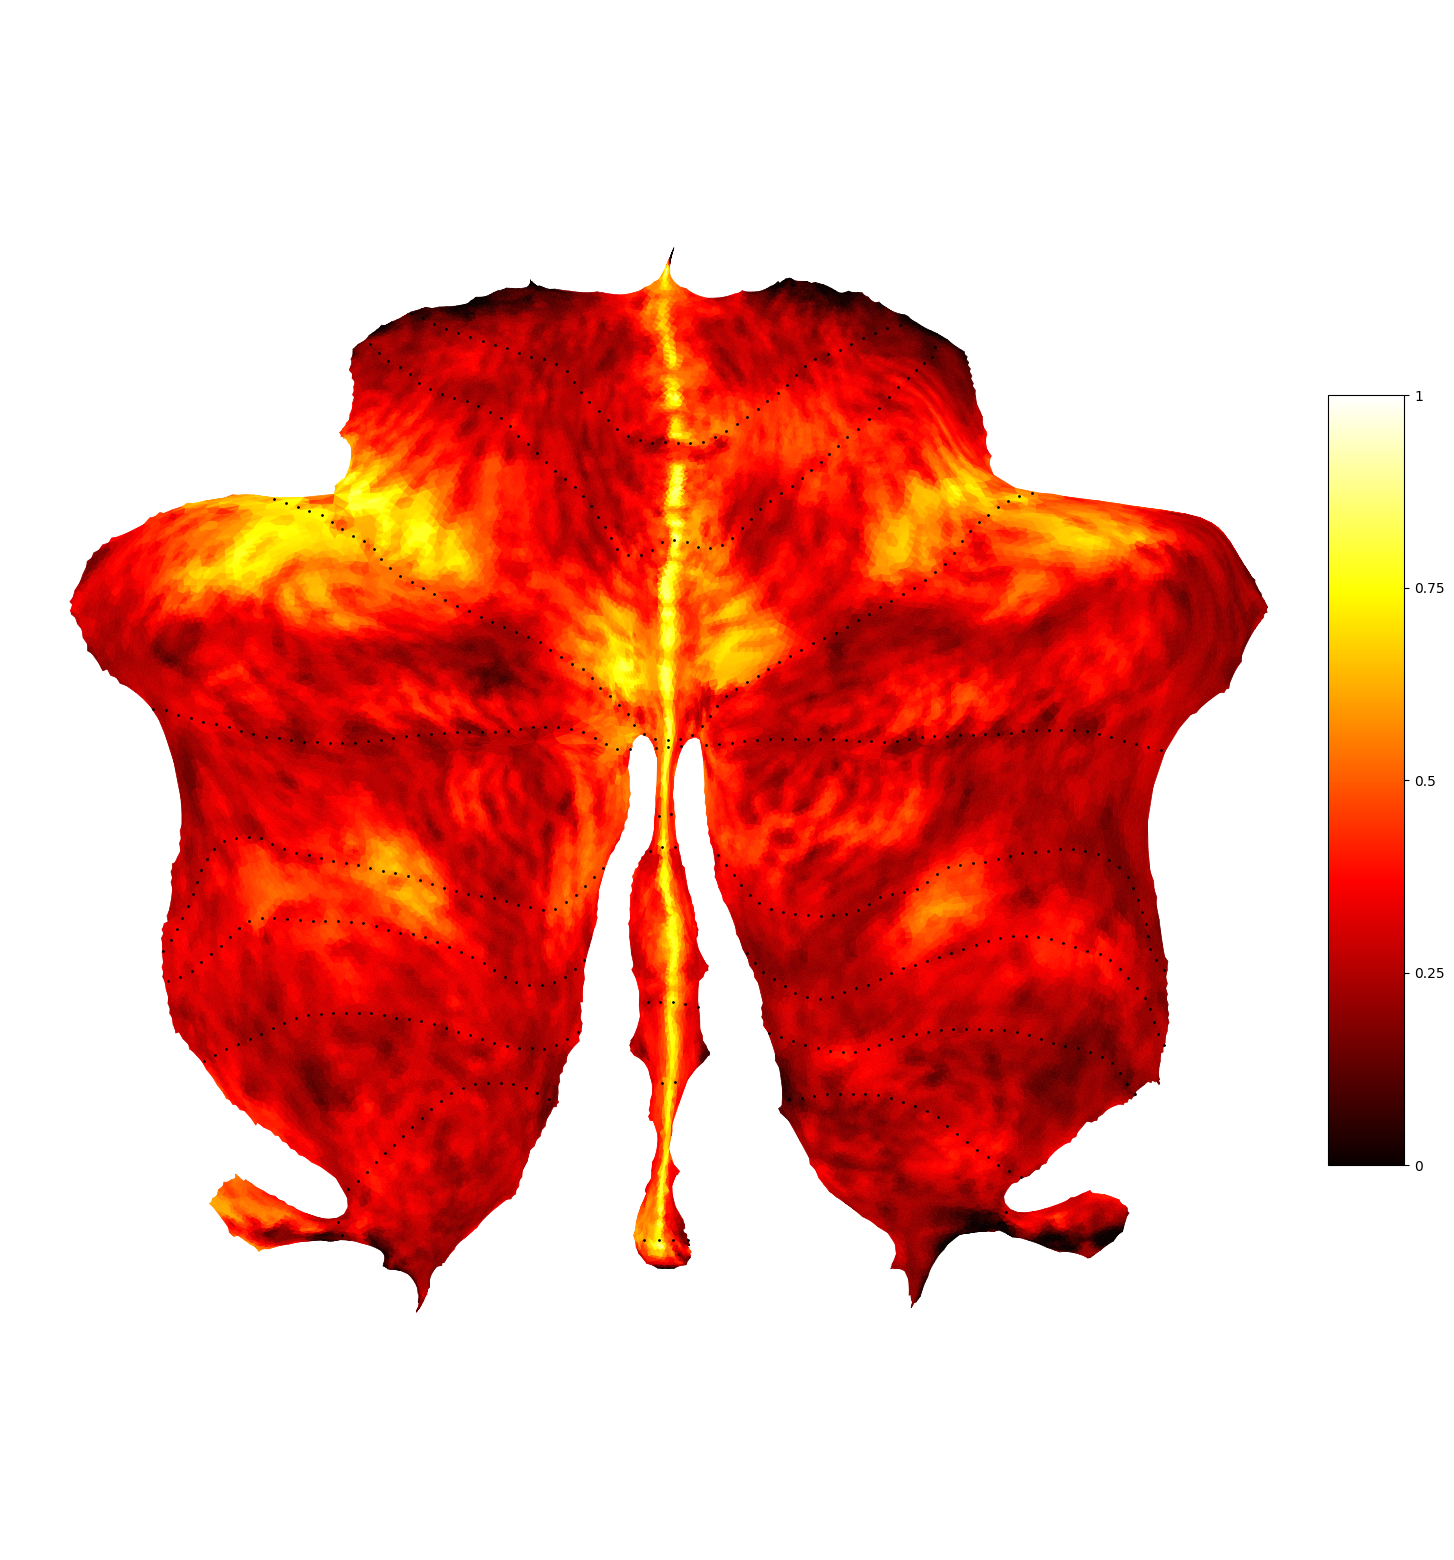

In [50]:
# Plot the results by dataset
plt.figure(figsize=(20, 20))
ut.plot_data_flat(corr_dataset[T.two_letter_code.tolist().index('De')
                               ], 'MNISymC2',
                   dtype='func',
                   colorbar=True,
                   cscale=(0, 1),
                   cmap='hot')



## Average only symmetric datasets (Md, Po, Wm, De, So)

In [39]:
# Average symmetric datasets
symmetric_datasets = ['Md', 'Po', 'Wm', 'De', 'So']
# Get indices of symmetric datasets
symmetric_indices = [i for i, x in enumerate(T.two_letter_code) if x in symmetric_datasets]

# Collect only numpy arrays from symmetric indices
corr_dataset_sym = [corr_dataset[i] for i in symmetric_indices]

# Stack
corr_dataset_sym = np.stack(corr_dataset_sym, axis=0)
# Average
corr_dataset_sym = corr_dataset_sym.mean(axis=0)


<AxesSubplot: >

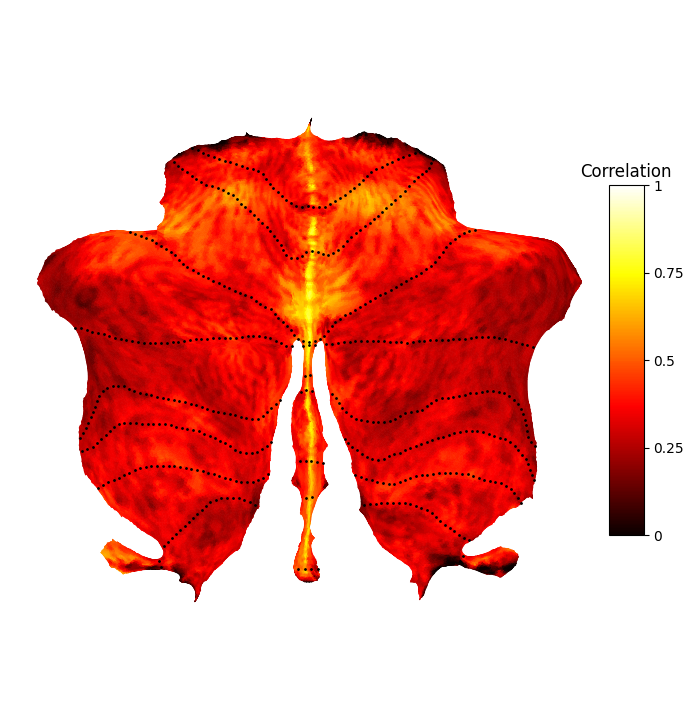

In [40]:
plt.figure(figsize=(20, 20))
ut.plot_multi_flat([corr_dataset_sym], 'MNISymC2',
                   grid=(2, 2),
                   dtype='func',
                   colorbar=True,
                   cscale=(0,1),
                   cmap='hot',
                        titles=['Correlation'])


<AxesSubplot: >

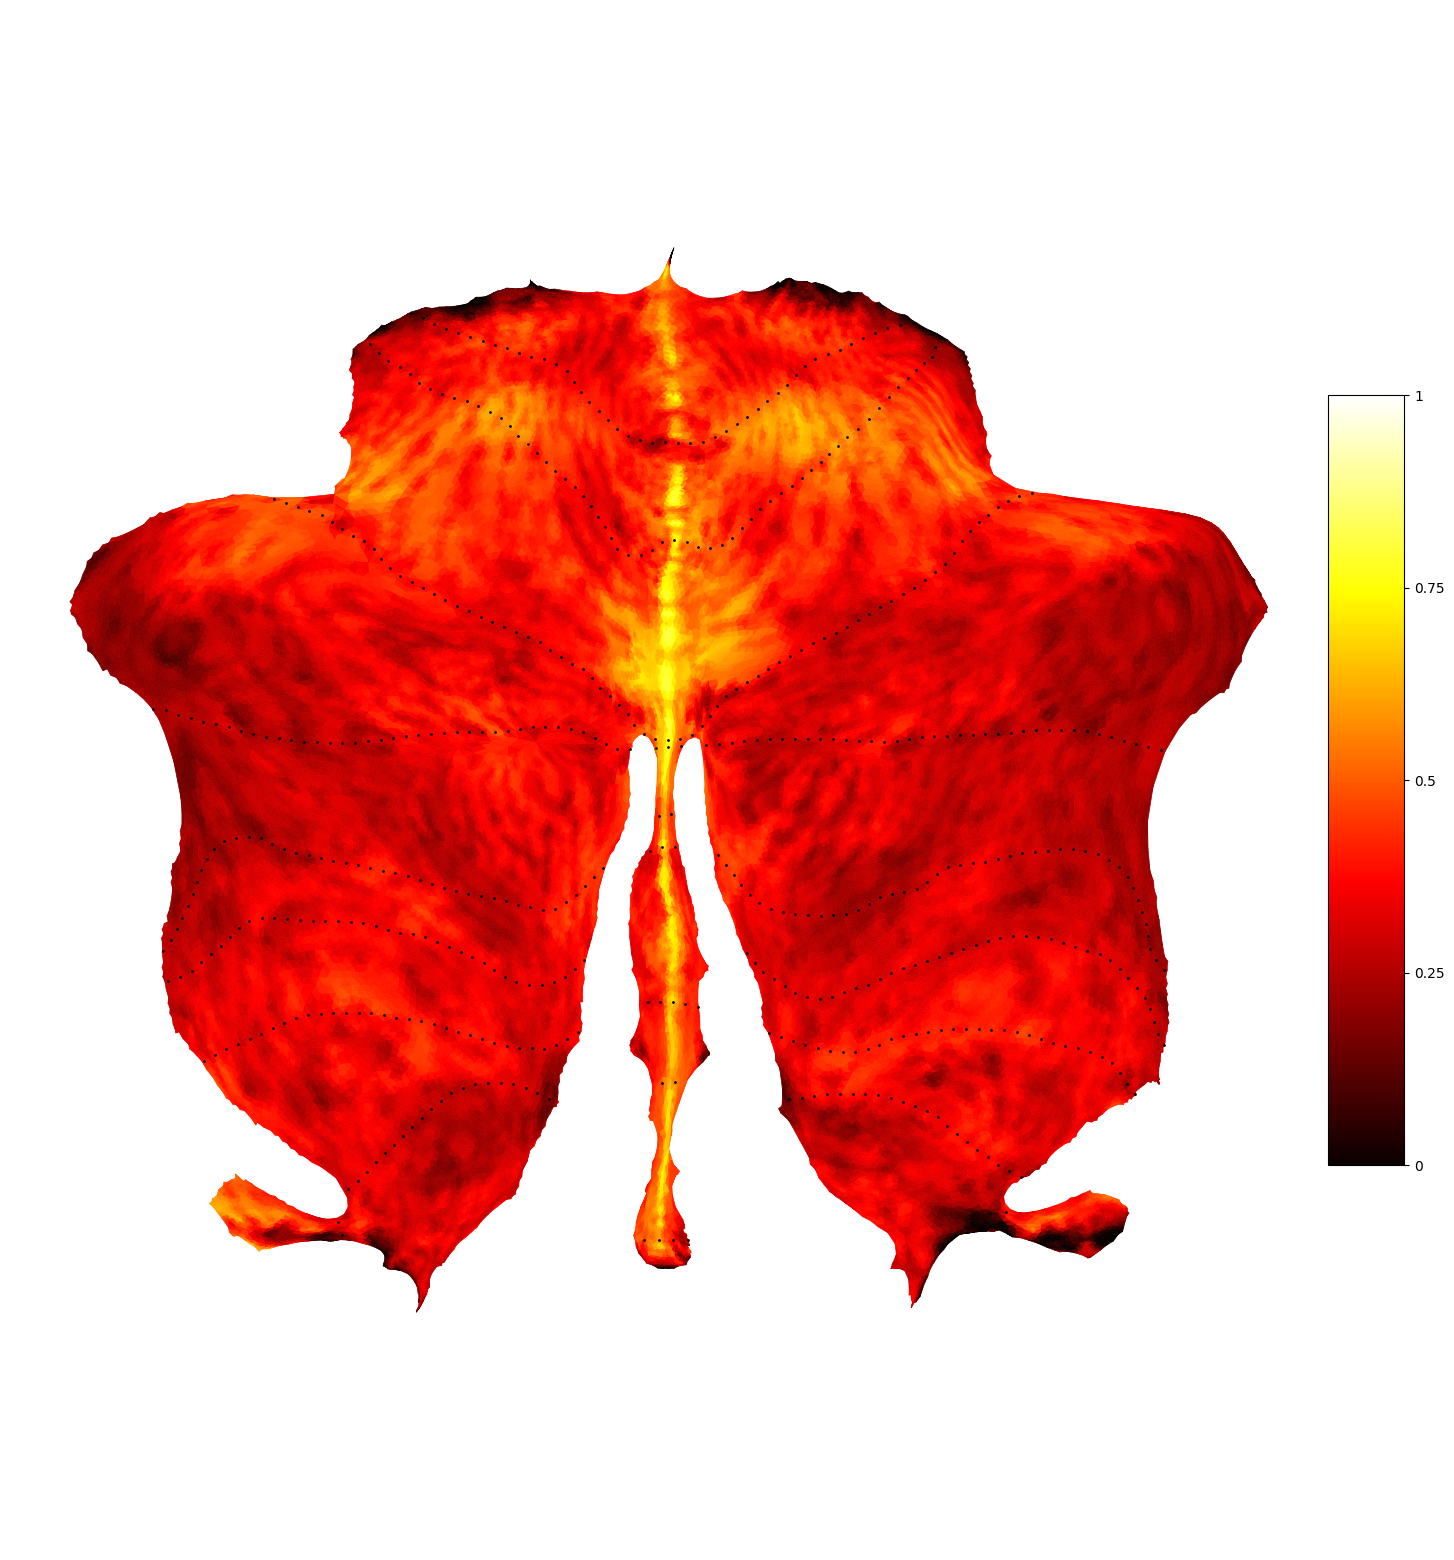

In [35]:
# Plot the results by dataset
plt.figure(figsize=(20, 20))
ut.plot_data_flat(corr_dataset_sym, 'MNISymC2',
                  dtype='func',
                  colorbar=True,
                  cscale=(0, 1),
                  cmap='hot')
